In [2]:
from datetime import datetime
import pandas as pd
import os
import numpy as np


def convert_dates(date):
    """
    Converts time since the Unix epoch in milliseconds to a datetime object.
    """
    return datetime.fromtimestamp(date / 1000)


def read_trade_data(filepath):
    """
    Read csv containing crypto trade data at <filepath>, convert time fields
    and select relevant columns.

    :param filepath: path to csv file
    :returns: (exchange, symbol, preprocessed Pandas dataframe)
    """
    trades = pd.read_csv(filepath)
    # convert dates from unix timestamps
    trades['date'] = trades['date'].apply(convert_dates)
    trades.set_index('date', inplace=True)
    trades.sort_index(ascending=True, inplace=True)
    # check data relates to a single exchange and coin pair
    assert trades['exchange'].nunique() == 1, 'Multiple exchanges present'
    assert trades['symbol'].nunique() == 1, 'Multiple symbols present'
    # select relevant columns
    trade_features = trades[['price', 'amount', 'sell']]
    exchange = trades['exchange'].iloc[0]
    symbol = trades['symbol'].iloc[0]
    return exchange, symbol, trade_features


In [3]:
read_trade_data('Bitfinex_BTCEUR_trades_'
                                             '2018_02_02.csv')


('bf', 'btceur',                            price    amount   sell
 date                                             
 2018-02-02 08:00:08  7349.600000  0.004568  False
 2018-02-02 08:00:09  7354.680450  0.010000   True
 2018-02-02 08:00:09  7354.680450  0.004568   True
 2018-02-02 08:00:10  7354.600000  0.102395  False
 2018-02-02 08:00:26  7343.407500  0.086580  False
 2018-02-02 08:00:26  7343.807250  0.204920  False
 2018-02-02 08:00:38  7356.000000  0.300000  False
 2018-02-02 08:00:38  7357.900000  0.088007  False
 2018-02-02 08:00:38  7355.800000  0.100000  False
 2018-02-02 08:00:39  7343.167650  0.088007  False
 2018-02-02 08:01:15  7352.281950  0.002000   True
 2018-02-02 08:01:55  7351.320200  0.300000   True
 2018-02-02 08:01:55  7351.320200  0.300000   True
 2018-02-02 08:01:55  7348.321701  0.300000   True
 2018-02-02 08:01:55  7339.326204  0.300000   True
 2018-02-02 08:01:55  7344.323702  0.300000   True
 2018-02-02 08:01:55  7339.825954  0.100000   True
 2018-02-02 08:

In [4]:
def write_processed(exchange, symbol, data, loc=None):
    """
    Write processed features for a given exchange and coin pair
    to a parquet file named '<exchange>_<symbol>_trades.parquet'.

    :param exchange: str exchange name
    :param symbol: str symbol name
    :param data: dataframe
    :param loc: alternative filepath in which to save
    """
    filename = f'{exchange}_{symbol}_trades.parquet'
    path = os.getcwd() if loc is None else loc
    filepath = os.path.join(path, filename)
    data.to_parquet(filepath)


if __name__ == "__main__":
    exchange, symbol, data = read_trade_data('Bitfinex_BTCEUR_trades_'
                                             '2018_02_02.csv')
    write_processed(exchange, symbol, data)

In [5]:
write_processed('bf', 'btceur' ,data)


In [6]:
df = pd.read_csv('Bitfinex_BTCEUR_trades_'
                                             '2018_02_02.csv')
print(df)

              id exchange  symbol           date        price    amount   sell
0      183601815       bf  btceur  1517529608000  7349.600000  0.004568  False
1      183601825       bf  btceur  1517529609000  7354.680450  0.010000   True
2      183601823       bf  btceur  1517529609000  7354.680450  0.004568   True
3      183601833       bf  btceur  1517529610000  7354.600000  0.102395  False
4      183601904       bf  btceur  1517529626000  7343.407500  0.086580  False
5      183601906       bf  btceur  1517529626000  7343.807250  0.204920  False
6      183602055       bf  btceur  1517529638000  7356.000000  0.300000  False
7      183602057       bf  btceur  1517529638000  7357.900000  0.088007  False
8      183602052       bf  btceur  1517529638000  7355.800000  0.100000  False
9      183602064       bf  btceur  1517529639000  7343.167650  0.088007  False
10     183602333       bf  btceur  1517529675000  7352.281950  0.002000   True
11     183602610       bf  btceur  1517529715000  73

In [7]:
df.head()


,id,exchange,symbol,date,price,amount,sell
0,183601815,bf,btceur,1517529608000,7349.60000,0.004568,False
1,183601825,bf,btceur,1517529609000,7354.68045,0.010000,True
2,183601823,bf,btceur,1517529609000,7354.68045,0.004568,True
3,183601833,bf,btceur,1517529610000,7354.60000,0.102395,False
4,183601904,bf,btceur,1517529626000,7343.40750,0.086580,False


In [8]:
df2 = df.drop(['exchange', 'symbol', 'sell'], axis=1)
print(df2)

              id           date        price    amount
0      183601815  1517529608000  7349.600000  0.004568
1      183601825  1517529609000  7354.680450  0.010000
2      183601823  1517529609000  7354.680450  0.004568
3      183601833  1517529610000  7354.600000  0.102395
4      183601904  1517529626000  7343.407500  0.086580
5      183601906  1517529626000  7343.807250  0.204920
6      183602055  1517529638000  7356.000000  0.300000
7      183602057  1517529638000  7357.900000  0.088007
8      183602052  1517529638000  7355.800000  0.100000
9      183602064  1517529639000  7343.167650  0.088007
10     183602333  1517529675000  7352.281950  0.002000
11     183602610  1517529715000  7351.320200  0.300000
12     183602612  1517529715000  7351.320200  0.300000
13     183602618  1517529715000  7348.321701  0.300000
14     183602629  1517529715000  7339.326204  0.300000
15     183602624  1517529715000  7344.323702  0.300000
16     183602627  1517529715000  7339.825954  0.100000
17     183

In [9]:
print(df2.head())
print(df2.tail())

          id           date       price    amount
0  183601815  1517529608000  7349.60000  0.004568
1  183601825  1517529609000  7354.68045  0.010000
2  183601823  1517529609000  7354.68045  0.004568
3  183601833  1517529610000  7354.60000  0.102395
4  183601904  1517529626000  7343.40750  0.086580
              id           date        price   amount
15710  185090480  1517615938000  7123.500000  0.10000
15711  185090657  1517615957000  7128.172061  0.03050
15712  185090708  1517615962000  7134.433152  0.02444
15713  185090729  1517615973000  7136.199101  0.01000
15714  185090748  1517615973000  7136.200000  0.00603


In [10]:
df3 = df.drop(['id', 'date', 'amount', 'exchange', 'symbol', 'sell'], axis=1)
print(df3.head())

        price
0  7349.60000
1  7354.68045
2  7354.68045
3  7354.60000
4  7343.40750


In [11]:
dfprice = df['price']

In [13]:
short_rolling = dfprice.rolling(window=20).mean()
short_rolling.tail(20)

15695    7134.931401
15696    7136.986401
15697    7139.071328
15698    7141.387229
15699    7141.001008
15700    7141.460877
15701    7141.525877
15702    7141.625877
15703    7141.785877
15704    7141.780394
15705    7141.760897
15706    7141.300414
15707    7140.839931
15708    7139.594931
15709    7138.442069
15710    7137.217069
15711    7136.607014
15712    7136.310013
15713    7136.101310
15714    7135.892652
Name: price, dtype: float64

In [14]:
long_rolling = dfprice.rolling(window=100).mean()
long_rolling.tail()

15710    7109.745258
15711    7109.866979
15712    7110.111311
15713    7110.263302
15714    7110.537302
Name: price, dtype: float64

In [15]:
df['short rolling'] = short_rolling
print(df.tail())

              id exchange  symbol           date        price   amount   sell  \
15710  185090480       bf  btceur  1517615938000  7123.500000  0.10000   True   
15711  185090657       bf  btceur  1517615957000  7128.172061  0.03050   True   
15712  185090708       bf  btceur  1517615962000  7134.433152  0.02444  False   
15713  185090729       bf  btceur  1517615973000  7136.199101  0.01000   True   
15714  185090748       bf  btceur  1517615973000  7136.200000  0.00603   True   

       short rolling  
15710    7137.217069  
15711    7136.607014  
15712    7136.310013  
15713    7136.101310  
15714    7135.892652  


In [22]:
df['long rolling sma'] = long_rolling
df['date'] = df['date'].apply(convert_dates)
print(df.tail())

              id exchange  symbol                date        price   amount  \
15710  185090480       bf  btceur 2018-02-03 07:58:58  7123.500000  0.10000   
15711  185090657       bf  btceur 2018-02-03 07:59:17  7128.172061  0.03050   
15712  185090708       bf  btceur 2018-02-03 07:59:22  7134.433152  0.02444   
15713  185090729       bf  btceur 2018-02-03 07:59:33  7136.199101  0.01000   
15714  185090748       bf  btceur 2018-02-03 07:59:33  7136.200000  0.00603   

        sell  short rolling  long rolling sma  
15710   True    7137.217069       7109.745258  
15711   True    7136.607014       7109.866979  
15712  False    7136.310013       7110.111311  
15713   True    7136.101310       7110.263302  
15714   True    7135.892652       7110.537302  


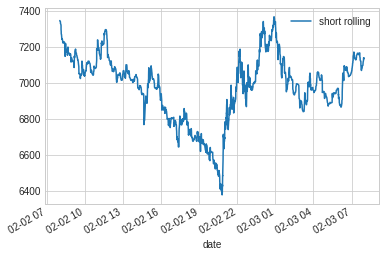

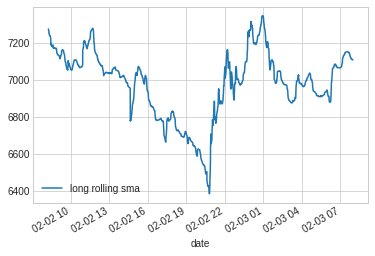

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')


df.plot(x = 'date', y = 'short rolling')
df.plot(x = 'date', y = 'long rolling sma')